# Project 3
Members:
 - Andreas Bjelland Berg

In [67]:
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np

## Problem 1
*In this problem, we want to approximate an integral*
$$
    I(f) = \int_0^1 f(x) dx
$$
*by Romberg's method $T_{m, 2}$ with number of function evaluations being $2^{m + 1} + 1$ for natural number $m$*

### Problem 1.1
*Implement your own code which calculates quadrature values using Romberg's method. For a function $f_1(x) = e^{-x}$, at least how many numbers of points do you need to achieve the absolute error $|I(f_1) - T_{m, 2}|$ smaller than $10^{-8}$?*

First, observe that by simple mathematics, we get
$$
    I(f_1) = \int_0^1 e^{-x} dx = 1 - \frac{1}{e}
$$

Observe also that $f_1$ is infinitely derivable, and is continuous on $[0, 1]$.

In [68]:
integral_f1 = 1 - 1 / np.exp(1)

In [69]:
def f1(x: float) -> float:
    return np.exp(-x)

In [70]:
def trapezoid(f: Callable, m: int, a: int, b: int):
    """Estimate the integral of function f using the Trapezoidal method

    Args:
        f (Callable): Function to apply Trapezoidal method to
        m (int): Number of equally spaced points
        a (int): Start of domain
        b (int): End of domain

    Returns:
        _type_: _description_
    """
    if m == 0:
        delta = (b - a)
    else:
        delta = (b - a) / m
    x_list = np.linspace(a, b, num=m+1)

    sum_ = 0
    for x in x_list[1: -1]:
        sum_ += f(x)
    sum_ += (f(x_list[0]) + f(x_list[-1])) / 2
    
    return delta * sum_

def rombergs(f: Callable, m: int, k: int = 2, a: int = 0, b: int = 1):
    """Apply Romberg's method T_{m, n} on function f

    Args:
        f (Callable): Function to apply Romberg's to
        m (int): Base for number of function evaluations. Evaluations are 
            2^{m + 1} + 1
        k (int, optional): Number of recursive steps to apply. Defaults to 2.
        a (int, optional): Start of domain. Defaults to 0
        b (int, optional): End of domain. Defaults to 1
    """
    if k == 0:
        return trapezoid(f, m, a, b)
    
    return (
        (4**k
            * rombergs(f, 2*m, k - 1, a, b)
            - rombergs(f, m, k - 1))
        / (4**k - 1)
    )

In [71]:
treshold = 1e-8

m = 0
while True:
    romberg_estimate = rombergs(f1, m, k=2, a=0, b=1)

    error = np.abs(integral_f1 - romberg_estimate)

    print(f"Error for m={m} ({2**(m+1)+1} evaluations): {error}")
    if error < treshold:
        print(f"Error passed treshold {treshold} at m={m} ({2**(m+1)+1} evaluations)")
        break

    m += 1

Error for m=0 (3 evaluations): 0.36787944117144233
Error for m=1 (5 evaluations): 3.1617976581355123e-07
Error for m=2 (9 evaluations): 5.061798757921565e-09
Error passed treshold 1e-08 at m=2 (9 evaluations)


### Problem 1.2
*Consider another integrand function $f_2(x) = e^{-|x - 1/2|}$. At least how many numbers of points do you need to achieve the absolute error smaller than $10^{-4}$?*

Once again, observe first that
$$
    I(f_2) = \int_0^1 e^{-|x - 1/2|} dx = \frac{-2}{\sqrt{e}} + 2
$$

In [72]:
integral_f2 = -2 / np.sqrt(np.exp(1)) + 2

In [73]:
def f2(x: float) -> float:
    return np.exp(- np.abs(x - 0.5))

In [74]:
treshold = 1e-4

m = 0
while True:
    romberg_estimate = rombergs(f2, m, k=2, a=0, b=1)

    error = np.abs(integral_f2 - romberg_estimate)

    print(f"Error for m={m} ({2**(m+1)+1} evaluations): {error}")
    if error < treshold:
        print(f"Error passed treshold {treshold} at m={m} ({2**(m+1)+1} evaluations)")
        break

    m += 1

Error for m=0 (3 evaluations): 0.18040802086209973
Error for m=1 (5 evaluations): 0.005442243324213392
Error for m=2 (9 evaluations): 6.301527410990104e-09
Error passed treshold 0.0001 at m=2 (9 evaluations)


### Problem 1.3
*Using the Gauss-Legendre quadrature, which is a Gaussian quadrature with the weight function $w(x) = 1$ on $[0, 1]$, at least how many numbers of points do you need to achieve the absolute error smaller than $10^{-8}$ for $f_1$? The same question for $f_2$ to achieve the absolute error smaller than $10^{-4}$.*

*In this sub-problem, you can use existing libraries for Gauss-Legendre quadrature such as `numpy.polynomial.legendre.leggaus`*

In [75]:
def gauss_legendre(f: Callable, m: int, a: int, b: int) -> float:
    x_list, weights = np.polynomial.legendre.leggauss(m)
    # Shift x-points to be in [a, b] instead of default [-1, 1]
    shifted_x = (
        0.5                 # Scale to [-0.5, 0.5]
            * (x_list + 1)  # Shift to [0, 1]
            * (b - a)         # Shift to [0, (b-a)]
        + a)                # Shift to [a, b]

    return sum(
        [weight * f(x) for weight, x in zip(weights, shifted_x)]
    ) * 0.5 * (b - a)       # Need to scale the quadrature formula too 

#### f1

In [76]:
treshold = 1e-8

m = 1
while True:
    gauss_legendre_estimate = gauss_legendre(f1, m, a=0, b=1)

    error = np.abs(integral_f1 - gauss_legendre_estimate)

    print(f"Error for m={m}: {error}")
    if error < treshold:
        print(f"Error passed treshold {treshold} at m={m}")
        break

    m += 1

Error for m=1: 0.02558989911592424
Error for m=2: 0.00014179929671220837
Error for m=3: 3.031644896234198e-07
Error for m=4: 3.432196749031391e-10
Error passed treshold 1e-08 at m=4


#### f2

In [77]:
treshold = 1e-4

m = 1
while True:
    gauss_legendre_estimate = gauss_legendre(f2, m, a=0, b=1)

    error = np.abs(integral_f2 - gauss_legendre_estimate)

    print(f"Error for m={m}: {error}")
    if error < treshold:
        print(f"Error passed treshold {treshold} at m={m}")
        break

    m += 1

Error for m=1: 0.21306131942526685
Error for m=2: 0.03768310748973558
Error for m=3: 0.03466605762534214
Error for m=4: 0.010587330175454657
Error for m=5: 0.013765995217472793
Error for m=6: 0.004964227020994083
Error for m=7: 0.007359555828410191
Error for m=8: 0.002878988260852644
Error for m=9: 0.004575384819653139
Error for m=10: 0.0018791520579409804
Error for m=11: 0.0031182244913130486
Error for m=12: 0.0013229740601868878
Error for m=13: 0.002260999010056941
Error for m=14: 0.000981838273164004
Error for m=15: 0.0017143175247024134
Error for m=16: 0.0007575586317827288
Error for m=17: 0.00134441854581413
Error for m=18: 0.0006022393961538919
Error for m=19: 0.0010825288445107661
Error for m=20: 0.0004902403106687991
Error for m=21: 0.0008903424186633702
Error for m=22: 0.0004068232526099891
Error for m=23: 0.0007451468096525415
Error for m=24: 0.00034302596590263246
Error for m=25: 0.0006327812051626358
Error for m=26: 0.0002931433933264227
Error for m=27: 0.000544044086723927

## Problem 2
*The implicit midpoint Runge-Kutta method is a method to find numerical solutions to initial value problems of the form*
$$
    \frac{dy}{dt} = f(t, y(t)), \quad y(t_0) = y_0
$$
*$y$ can be vector-valued. For a given step size $h$ the method works as follows. For each step $n$ set up the following equation*
$$
    y_{n + 1} = y_n + h * f(t + \frac{h}{2}, \frac{1}{2}(y_n + y_{n+1}))
$$
*You solve this equation to get $y_{n+1}$, the next step. The end result is a list of function values which approximate $y$ with a time step of $h$ between them.*

*Consider the Kermack-McKendrick epodemiological model*
$$
    S' = -\beta S I, \quad I' = \beta S I, \quad R' = \gamma I
$$
*where $I$ models the proportion of infected people, $S$ the proportion of susceptible people, $R$ the proportion of recovered people, $\beta$ the infection rate, and $\gamma$ the recovery rate.*

### Problem 2.1
*Use the implicit midpoint Runge-Kutta method to implement a function to find numerical solutions to this system of ODEs. One step of the method is*
$$
    (S, I, R)_{n+1} = (S, I, R)_n + h (-\beta \frac{S_n + S_{n+1}}{2}\frac{I_n + I_{n+1}}{2}, \beta \frac{S_n + S_{n+1}}{2} \frac{I_n + I_{n+1}}{2} - \gamma \frac{I_n + I_{n+1}}{2}, \gamma \frac{I_n + I_{n+1}}{2})
$$

In [115]:
# From project 1
def infinity_norm(x: np.ndarray):
    return np.linalg.norm(x, ord=np.inf)

In [119]:
def implicit_midpoint_runge_kutta(timesteps: np.ndarray, initial_y: np.ndarray, f: Callable, tol: float):
    h = timesteps[-1] - timesteps[-2]
    y = np.zeros((len(timesteps), len(initial_y)))
    y[0] = initial_y

    while True:
        prev_last_y = y[-1]
        for n in range(len(y) - 1):
            y[n + 1] = y[n] + h * f(timesteps[n] + h/2, 0.5 * (y[n] + y[n + 1]))
        
        if infinity_norm(np.abs(prev_last_y - y[-1])) < tol:
            break
    
    return y

In [120]:
def kermack_mckendrick_wrapper(beta: float, gamma: float):
    def kermack_mckendrick_func(t: float, x: np.ndarray) -> np.ndarray:
        """Assumes x == np.ndarray([S, I, R])"""
        return np.array([
            -beta * x[0] * x[1],
             beta * x[0] * x[1] - gamma * x[1],
            gamma * x[1]
        ])
    return kermack_mckendrick_func

In [124]:
def solve_kermack_mckendrick(beta: float, gamma: float, timesteps: np.ndarray, initial_y: np.ndarray, tol: float):
    derivate_func = kermack_mckendrick_wrapper(beta, gamma)
    return implicit_midpoint_runge_kutta(timesteps, initial_y, derivate_func, tol)

### Problem 2.2
Graph your solution for 4 sufficiently different choices of $\beta \in [1, 4]$ and $\gamma \in [1, 4]$ with $\beta > \gamma$ and initial values $(S-0, I_0, R_0) = (0.99, 0.01, 0)$

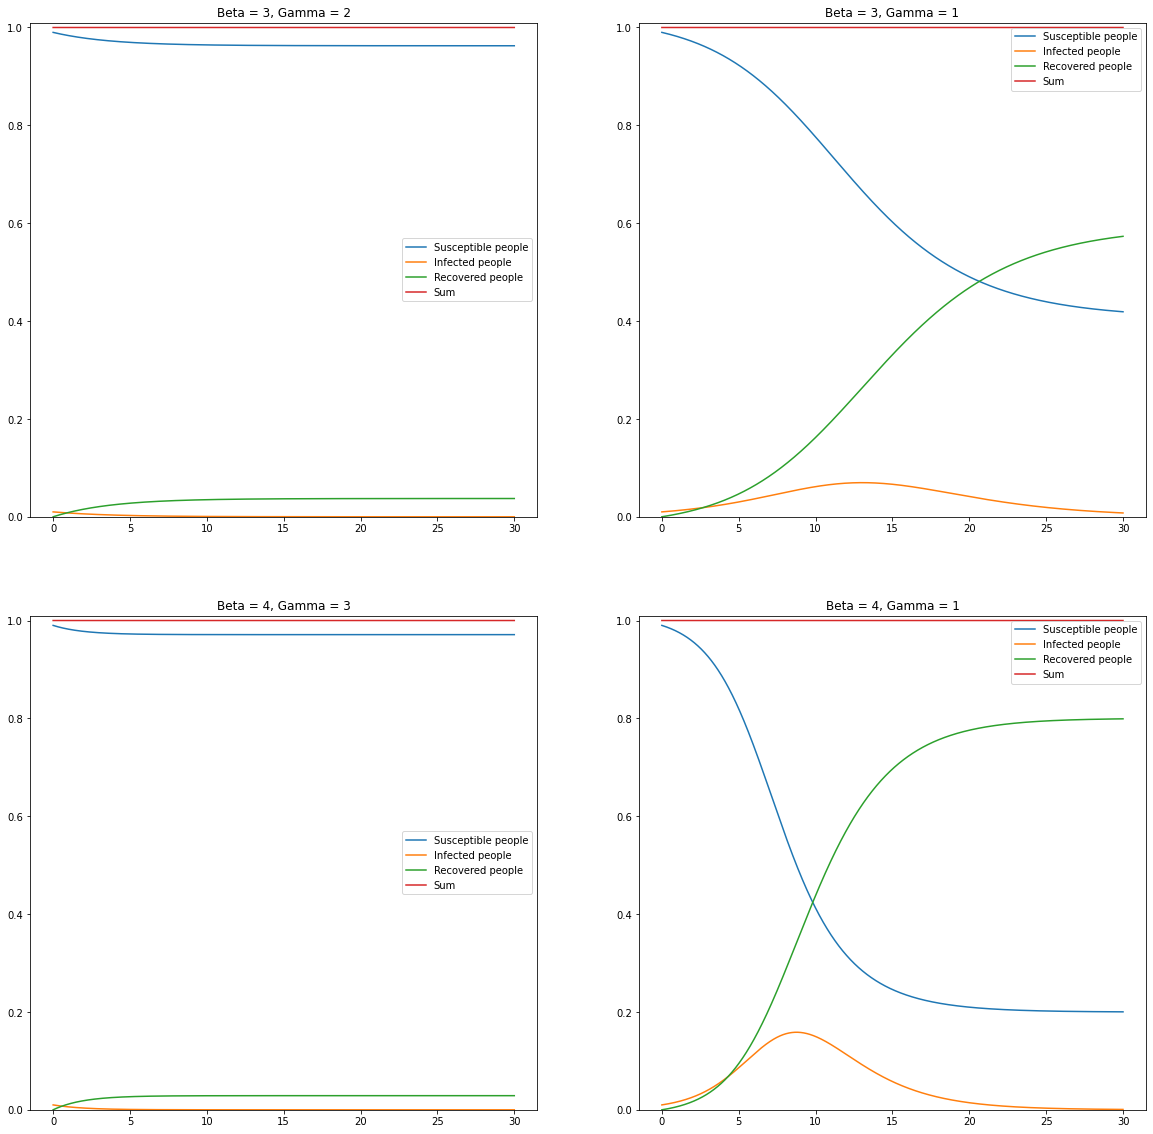

In [151]:
timesteps = np.linspace(0, 30, 10000)
initial_y = np.array([0.99, 0.01, 0.])
tol = 1e-10

betas = [3, 3, 4, 4]
gammas = [2, 1, 3, 1]

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.flat
for i in range(4):
    ax[i].set(ylim=[0, 1.01])
    results = solve_kermack_mckendrick(betas[i], gammas[i], timesteps, initial_y, tol)
    results = results.T
    ax[i].set_title(f"Beta = {betas[i]}, Gamma = {gammas[i]}")
    ax[i].plot(timesteps, results[0], label="Susceptible people")
    ax[i].plot(timesteps, results[1], label="Infected people")
    ax[i].plot(timesteps, results[2], label="Recovered people")
    ax[i].plot(timesteps, results[0] + results[1] + results[2], label="Sum")
    ax[i].legend()

#### Comments
The graphs appear to look somewhat like other examples of Kermack-McKendrick-plots I have seen, in that the number of infected people rise, then fall back down, as the number of recovered, thus "safe" people increase.

I am intrigued by the flatness of the plots with gamma somewhat near the beta. It appears that there are simply not enough people left to infect the others before they recover, leading the number of infected people to sharply fall towards 0. It could be the case that the numbers are evaluated at different times, but this is not true for my implementation, so it may be simply the case when enough people recover compared to the number getting infected (i.e. with gamma=3 and beta=4, in the first step, only 4*0.99=3.96 people get infected, so this will quickly fall as the proportion of susceptible people sink).

Note that I have not implemented this using Newton's method from project 1. I have instead opted to do the iteration within the function, simply iterating through timesteps, round after round, until it converges with a user-supplied tolerance. This was simpler, in my mind, to implement than shaping everything to fit into the code from project 1.

## Problem 3
*Consider the Lorenz system, an early meteorological model,*
$$
    x' = 10(y - x), \quad y' = x(28 - z), \quad z' = xy - 8z/3
$$
*Use the modified Euler's method to find a numerical solution to this system of ODEs with intial values $x = 1$ and $y = z = 0$. Solve it with a step count of 100000 and 100001 ($h \approx 0.0005$), both on the same interval.*

*Graph your two solutions on the time interval $[0, 50]$. As in Problem 2, graph each of $x$, $y$ and $z$ independently. Also graph a third solution with step size matching one of the other two, but initial values $x = 1$, $y = 0.0001$ and $z = 0$.*

In [152]:
def modified_euler_method(x: np.ndarray, initial_y: np.ndarray, f: Callable, tol: float):
    h = x[-1] - x[-2]
    y = np.zeros((len(x), len(initial_y)))
    y[0] = initial_y

    while True:
        prev_last_y = y[-1]
        for n in range(len(y) - 1):
            y[n + 1] = y[n] + h * f(x[n] + h/2, y[n] + 0.5 * h * f(x[n], y[n]))
        
        if infinity_norm(np.abs(prev_last_y - y[-1])) < tol:
            break
    
    return y

In [153]:
def lorenz_function(t: float, x: np.ndarray) -> np.ndarray:
    """Assumes x is np.ndarray([x, y, z])"""
    return np.array([
        10 * (x[1] - x[0]),
        x[0] * (28 - x[2]),
        x[0] * x[1] - 8 * x[2] / 3
    ])

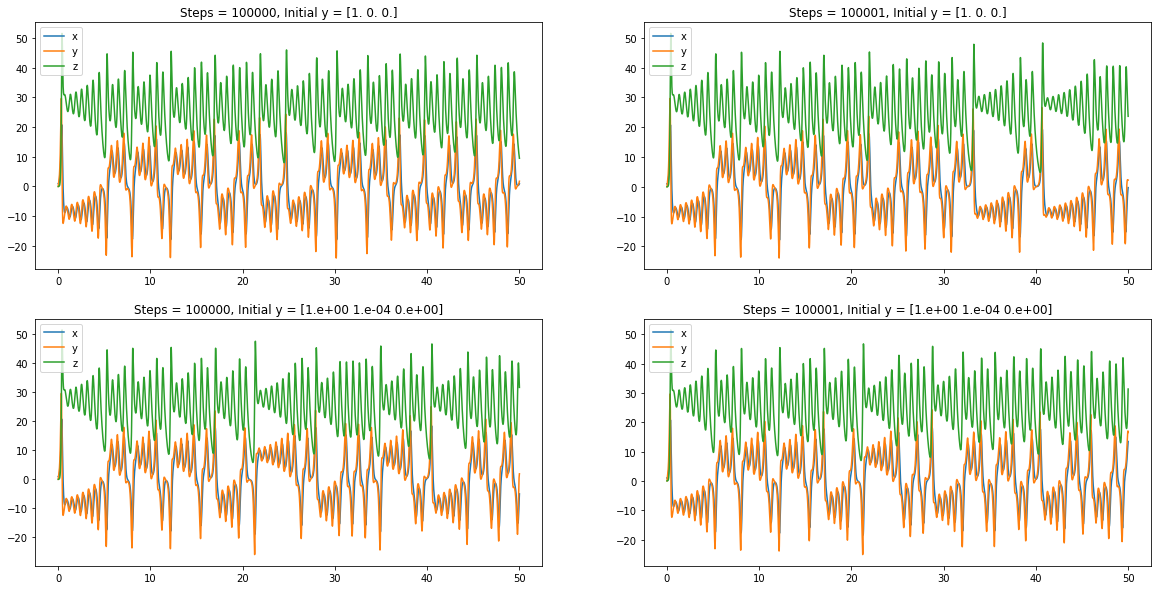

In [157]:
steps = [np.linspace(0, 50, 100000), np.linspace(0, 50, 100001)]
initial_y = [np.array([1., 0., 0.]), np.array([1, 0.0001, 0.])]
tol = 1e-10

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
ax = axes.flat
for i in range(4):
    step_i = i % 2
    initial_i = i // 2
    ax[i].set_title(f"Steps = {steps[step_i].shape[-1]}, Initial y = {initial_y[initial_i]}")
    results = modified_euler_method(steps[step_i], initial_y[initial_i], lorenz_function, tol)
    results = results.T
    ax[i].plot(steps[step_i], results[0], label="x")
    ax[i].plot(steps[step_i], results[1], label="y")
    ax[i].plot(steps[step_i], results[2], label="z")
    ax[i].legend()

#### Comments
It appears that the graphs are highly unstable. While this may make sense, given that meteorological systems tend to be somewhat unstable, it may also indicate something wrong with my implementation. I do not, sadly, have time to figure this out, largely due to a concussion I received the other day stealing my energy, so this will be how it stays.